In [13]:
import geemap, ee
import geopandas as gpd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

In [38]:
# Set path to wd
path = os.path.join("/","Users","MT","Nextcloud","Projects","GOV-BGD20GIZ7333_CRISC_AI")

In [39]:
# helper function: lookup shp index by city/levell geodataframe format, ee object construct
def shp_to_ee_fmt(city, level):
    dic = {'Satkhira':{2:56,3:469,4:4307},'Sirajganj':{2:59,3:496,4:4493}}
    ind = dic[city][level]
    shp_path = os.path.join(path,"CRISC_RS","bgd_adm_bbs_20201113_SHP","bgd_admbnda_adm"+str(level)+"_bbs_20201113.shp")
    gdf = gpd.read_file(shp_path, crs='EPSG:4326')
    x = gdf.iloc[ind:ind+1,:]
    data = json.loads(x.to_json())
    return data['features'][0]['geometry']['coordinates']

# Source shp: https://data.humdata.org/dataset/administrative-boundaries-of-bangladesh-as-of-2015

In [20]:
viirs = ee.Image(ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2019-01-01","2019-12-31").median().select('avg_rad'))

In [9]:
srtm = ee.Image("CGIAR/SRTM90_V4").select('elevation')
srtmVis = {'min':-1, 'max':14,'palette':['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#005824']}

In [220]:
water = ee.Image("JRC/GSW1_3/GlobalSurfaceWater").select('occurrence')
waterVis= {"min":0, "max":50,"palette":['lightblue', 'blue'], "bands":"occurrence"}


In [238]:
ghslSet = ee.ImageCollection('JRC/GHSL/P2016/SMOD_POP_GLOBE_V1').filter(ee.Filter.date('2015-01-01', '2015-12-31')).select('smod_code').median();
ghslSetVis= {"min":0.0, "max":3.0,"palette":['000000', '448564', '70daa4', 'ffffff']}

In [243]:
ghslPop = ee.ImageCollection("JRC/GHSL/P2016/POP_GPW_GLOBE_V1").filter(ee.Filter.date('2015-01-01', '2015-12-31')).select('population_count').median();
ghslPopVis= {"min":0.0, "max":5000.0,"palette":['000000', '448564', '70daa4', 'ffffff']}

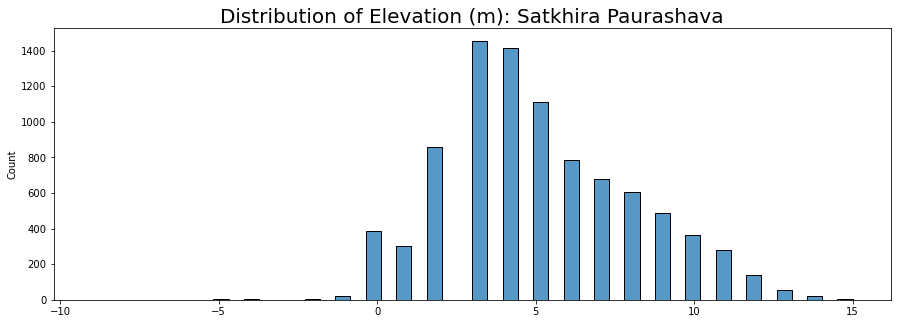

In [40]:
# Histogram of elevation
aoi = ee.Geometry.MultiPolygon(shp_to_ee_fmt(city = 'Satkhira', level = 4))

arr = np.array(srtm.sampleRectangle(region=aoi).get('elevation').getInfo())
data = arr.flatten()

fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data, bins=50,ax=ax)
plt.title('Distribution of Elevation (m): Satkhira Paurashava', fontsize=20);

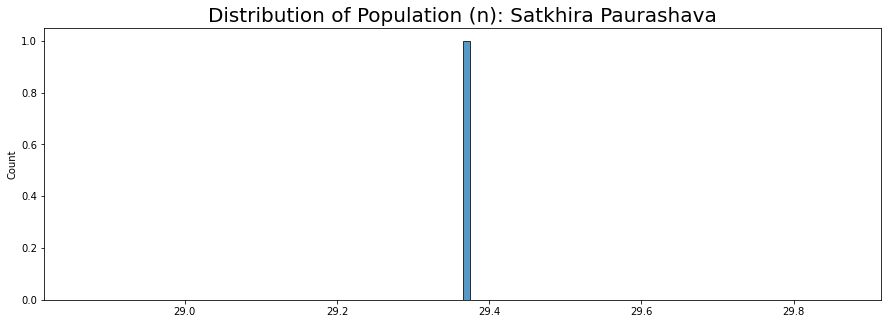

In [252]:
# Histogram of Pop
aoi = ee.Geometry.MultiPolygon(shp_to_ee_fmt(level = 4, ind = 4307))

arr = np.array(ghslPop.sampleRectangle(region=aoi).get('population_count').getInfo())
data = arr.flatten()

fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data, bins=100,ax=ax)
plt.title('Distribution of Population (n): Satkhira Paurashava', fontsize=20);

In [1]:
# Histogram of elevation
aoi = ee.Geometry.MultiPolygon(shp_to_ee_fmt(city = 'Sirajganj', level = 4))

arr = np.array(srtm.sampleRectangle(region=aoi).get('elevation').getInfo())
data = arr.flatten()

fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data, bins=50,ax=ax)
plt.title('Distribution of Elevation (m): Sirajganj Paurashava', fontsize=20);

NameError: name 'ee' is not defined

In [231]:
#AOI: Sirajganj District (Rajshahi Division)
aoi = ee.Geometry.MultiPolygon(shp_to_ee_fmt(city = 'Sirajganj', level = 4))

# initialize the map
map1 = geemap.Map()
map1.centerObject(aoi, 12)
#map1.addLayer(viirs.clip(aoi), {}, "VIIRS-DNB", opacity=0.5)
#map1.addLayer(ghsl.clip(aoi), ghslVis, 'Degree of Urbanization')
map1.addLayer(srtm.clip(aoi), {'min':6, 'max':20}, 'srtm', opacity = 0.6)
map1.addLayer(water.clip(aoi), waterVis, 'water', opacity = 0.6)
map1.addLayerControl()
map1

Map(center=[24.458200813238324, 89.70717738049731], controls=(WidgetControl(options=['position', 'transparent_…